# Regrid drought files to common grid

Regrid everything (Aus files) to a 2° grid

In [24]:
import xarray as xr
import numpy as np
import xesmf as xe
import matplotlib.pyplot as plt
import os
from dask.diagnostics import ProgressBar


In [95]:
# # Instructions for regridding using xesmf are here: https://xesmf.readthedocs.io/en/latest/notebooks/Dataset.html
# def regrid_files(ds_to_regrid, ds_target ):
#     # resolution of output: same as cesm-lme
#     ds_out = xr.Dataset({'lat': (['lat'], ds_target.lat),
#                          'lon': (['lon'], ds_target.lon)})

#     regridder = xe.Regridder(ds_to_regrid, ds_out, 'bilinear')
#     regridder.clean_weight_file()

#     ds_out = regridder(ds_to_regrid)
#     for k in ds_to_regrid.data_vars:
#         print(k, ds_out[k].equals(regridder(ds_to_regrid[k])))

#     return ds_out

def regrid_files(ds):
    # resolution of output 3°?
    #[110, 156, -45, -4
#     ds_out = xr.Dataset({'lat': (['lat'], np.arange(-90, 92, 2.5)),
#                          'lon': (['lon'], np.arange(0, 360, 2.5))})
    ds_out = xr.Dataset({'lat': (['lat'], np.arange(-90, 92, 2)),
                         'lon': (['lon'], np.arange(0, 360, 2))})
    
    regridder = xe.Regridder(ds, ds_out, 'bilinear', periodic=False)
#     regridder = xe.Regridder(ds, ds_out, 'bilinear')


    # regridder.clean_weight_file()
    
    ds_out = regridder(ds)
#     for k in ds.data_vars:
#         print(k, ds_out[k].equals(regridder(ds[k])))
        
    return ds_out

In [15]:
def save_netcdf_compression(ds, output_dir, filename):

    comp = dict(zlib=True, complevel=8)
    encoding = {var: comp for var in ds.data_vars}

    delayed_obj = ds.to_netcdf('%s/%s.nc' % (output_dir, filename), mode='w', compute=False, encoding=encoding)
    with ProgressBar():
        results = delayed_obj.compute()

In [4]:
input_dir = '../files'
# input_dir = '/Users/nickywright/repos/palaeoclimate-lastmillennium/drought_frequencies/'
# input_dir_lm = '%s/lastmillennium_threshold_1900-2000' % (input_dir)

---

# Import files

## historical

In [26]:
historical_year = 1900
input_dir_hist = '%s/historical_%s' % (input_dir, historical_year)

In [27]:
regridded_hist_output_dir = '%s/aus_2degrees' % input_dir_hist

In [28]:
if not os.path.exists(regridded_hist_output_dir):
    print("... Creating %s now "  % regridded_hist_output_dir)
    os.makedirs(regridded_hist_output_dir)

... Creating ../files/historical_1900/aus_2degrees now 


### CESM-LME full forcing

In [7]:
ff1_precip_hist_annual_aus  = xr.open_dataset('%s/cesmlme-ff%s_precip_hist_annual_aus.nc' % (input_dir_hist + '/aus', '1'))
ff2_precip_hist_annual_aus  = xr.open_dataset('%s/cesmlme-ff%s_precip_hist_annual_aus.nc' % (input_dir_hist + '/aus', '2'))
ff3_precip_hist_annual_aus  = xr.open_dataset('%s/cesmlme-ff%s_precip_hist_annual_aus.nc' % (input_dir_hist + '/aus', '3'))
ff4_precip_hist_annual_aus  = xr.open_dataset('%s/cesmlme-ff%s_precip_hist_annual_aus.nc' % (input_dir_hist + '/aus', '4'))
ff5_precip_hist_annual_aus  = xr.open_dataset('%s/cesmlme-ff%s_precip_hist_annual_aus.nc' % (input_dir_hist + '/aus', '5'))
ff6_precip_hist_annual_aus  = xr.open_dataset('%s/cesmlme-ff%s_precip_hist_annual_aus.nc' % (input_dir_hist + '/aus', '6'))
ff7_precip_hist_annual_aus  = xr.open_dataset('%s/cesmlme-ff%s_precip_hist_annual_aus.nc' % (input_dir_hist + '/aus', '7'))
ff8_precip_hist_annual_aus  = xr.open_dataset('%s/cesmlme-ff%s_precip_hist_annual_aus.nc' % (input_dir_hist + '/aus', '8'))
ff9_precip_hist_annual_aus  = xr.open_dataset('%s/cesmlme-ff%s_precip_hist_annual_aus.nc' % (input_dir_hist + '/aus', '9'))
ff10_precip_hist_annual_aus = xr.open_dataset('%s/cesmlme-ff%s_precip_hist_annual_aus.nc' % (input_dir_hist + '/aus', '10'))
ff11_precip_hist_annual_aus = xr.open_dataset('%s/cesmlme-ff%s_precip_hist_annual_aus.nc' % (input_dir_hist + '/aus', '11'))
ff12_precip_hist_annual_aus = xr.open_dataset('%s/cesmlme-ff%s_precip_hist_annual_aus.nc' % (input_dir_hist + '/aus', '12'))
ff13_precip_hist_annual_aus = xr.open_dataset('%s/cesmlme-ff%s_precip_hist_annual_aus.nc' % (input_dir_hist + '/aus', '13'))

In [11]:
ff1_precip_hist_annual_aus_rg  = regrid_files(ff1_precip_hist_annual_aus)
ff2_precip_hist_annual_aus_rg  = regrid_files(ff2_precip_hist_annual_aus)
ff3_precip_hist_annual_aus_rg  = regrid_files(ff3_precip_hist_annual_aus)
ff4_precip_hist_annual_aus_rg  = regrid_files(ff4_precip_hist_annual_aus)
ff5_precip_hist_annual_aus_rg  = regrid_files(ff5_precip_hist_annual_aus)
ff6_precip_hist_annual_aus_rg  = regrid_files(ff6_precip_hist_annual_aus)
ff7_precip_hist_annual_aus_rg  = regrid_files(ff7_precip_hist_annual_aus)
ff8_precip_hist_annual_aus_rg  = regrid_files(ff8_precip_hist_annual_aus)
ff9_precip_hist_annual_aus_rg  = regrid_files(ff9_precip_hist_annual_aus)
ff10_precip_hist_annual_aus_rg = regrid_files(ff10_precip_hist_annual_aus)
ff11_precip_hist_annual_aus_rg = regrid_files(ff11_precip_hist_annual_aus)
ff12_precip_hist_annual_aus_rg = regrid_files(ff12_precip_hist_annual_aus)
ff13_precip_hist_annual_aus_rg = regrid_files(ff13_precip_hist_annual_aus)

In [29]:
save_netcdf_compression(ff1_precip_hist_annual_aus_rg , regridded_hist_output_dir, 'cesmlme-ff%s_precip_hist_annual_aus_2d.nc' % '1')
save_netcdf_compression(ff2_precip_hist_annual_aus_rg , regridded_hist_output_dir, 'cesmlme-ff%s_precip_hist_annual_aus_2d.nc' % '2')
save_netcdf_compression(ff3_precip_hist_annual_aus_rg , regridded_hist_output_dir, 'cesmlme-ff%s_precip_hist_annual_aus_2d.nc' % '3')
save_netcdf_compression(ff4_precip_hist_annual_aus_rg , regridded_hist_output_dir, 'cesmlme-ff%s_precip_hist_annual_aus_2d.nc' % '4')
save_netcdf_compression(ff5_precip_hist_annual_aus_rg , regridded_hist_output_dir, 'cesmlme-ff%s_precip_hist_annual_aus_2d.nc' % '5')
save_netcdf_compression(ff6_precip_hist_annual_aus_rg , regridded_hist_output_dir, 'cesmlme-ff%s_precip_hist_annual_aus_2d.nc' % '6')
save_netcdf_compression(ff7_precip_hist_annual_aus_rg , regridded_hist_output_dir, 'cesmlme-ff%s_precip_hist_annual_aus_2d.nc' % '7')
save_netcdf_compression(ff8_precip_hist_annual_aus_rg , regridded_hist_output_dir, 'cesmlme-ff%s_precip_hist_annual_aus_2d.nc' % '8')
save_netcdf_compression(ff9_precip_hist_annual_aus_rg , regridded_hist_output_dir, 'cesmlme-ff%s_precip_hist_annual_aus_2d.nc' % '9')
save_netcdf_compression(ff10_precip_hist_annual_aus_rg, regridded_hist_output_dir, 'cesmlme-ff%s_precip_hist_annual_aus_2d.nc' % '10')
save_netcdf_compression(ff11_precip_hist_annual_aus_rg, regridded_hist_output_dir, 'cesmlme-ff%s_precip_hist_annual_aus_2d.nc' % '11')
save_netcdf_compression(ff12_precip_hist_annual_aus_rg, regridded_hist_output_dir, 'cesmlme-ff%s_precip_hist_annual_aus_2d.nc' % '12')
save_netcdf_compression(ff13_precip_hist_annual_aus_rg, regridded_hist_output_dir, 'cesmlme-ff%s_precip_hist_annual_aus_2d.nc' % '13')

[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s


In [63]:
ff_all_precip_hist_annual_aus = xr.open_dataset('%s/cesmlme-ff_all_precip_hist_annual_aus.nc' % (input_dir_hist + '/aus'))
ff_all_precip_hist_annual_aus_rg = regrid_files(ff_all_precip_hist_annual_aus)
save_netcdf_compression(ff_all_precip_hist_annual_aus_rg, regridded_hist_output_dir, 'cesmlme-ff_all_precip_hist_annual_aus_2d.nc')

[########################################] | 100% Completed |  0.1s


### CESM-LME single forcing

In [104]:
lme_850forcing3_precip_hist_annual_aus = xr.open_dataset('%s/aus/cesmlme-850forcing3_precip_hist_annual_aus.nc' % input_dir_hist)
lme_ghg1_precip_hist_annual_aus  = xr.open_dataset('%s/aus/cesmlme-ghg1_precip_hist_annual_aus.nc' % input_dir_hist)
lme_ghg2_precip_hist_annual_aus  = xr.open_dataset('%s/aus/cesmlme-ghg2_precip_hist_annual_aus.nc' % input_dir_hist)
lme_ghg3_precip_hist_annual_aus  = xr.open_dataset('%s/aus/cesmlme-ghg3_precip_hist_annual_aus.nc' % input_dir_hist)
lme_lulc1_precip_hist_annual_aus = xr.open_dataset('%s/aus/cesmlme-lulc1_precip_hist_annual_aus.nc' % input_dir_hist)
lme_lulc2_precip_hist_annual_aus = xr.open_dataset('%s/aus/cesmlme-lulc2_precip_hist_annual_aus.nc' % input_dir_hist)
lme_lulc3_precip_hist_annual_aus = xr.open_dataset('%s/aus/cesmlme-lulc3_precip_hist_annual_aus.nc' % input_dir_hist)
lme_orbital1_precip_hist_annual_aus = xr.open_dataset('%s/aus/cesmlme-orbital1_precip_hist_annual_aus.nc' % input_dir_hist)
lme_orbital2_precip_hist_annual_aus = xr.open_dataset('%s/aus/cesmlme-orbital2_precip_hist_annual_aus.nc' % input_dir_hist)
lme_orbital3_precip_hist_annual_aus = xr.open_dataset('%s/aus/cesmlme-orbital3_precip_hist_annual_aus.nc' % input_dir_hist)
lme_solar1_precip_hist_annual_aus = xr.open_dataset('%s/aus/cesmlme-solar1_precip_hist_annual_aus.nc' % input_dir_hist)
lme_solar3_precip_hist_annual_aus = xr.open_dataset('%s/aus/cesmlme-solar3_precip_hist_annual_aus.nc' % input_dir_hist)
lme_solar4_precip_hist_annual_aus = xr.open_dataset('%s/aus/cesmlme-solar4_precip_hist_annual_aus.nc' % input_dir_hist)
lme_solar5_precip_hist_annual_aus = xr.open_dataset('%s/aus/cesmlme-solar5_precip_hist_annual_aus.nc' % input_dir_hist)
lme_ozone1_precip_hist_annual_aus = xr.open_dataset('%s/aus/cesmlme-ozone1_precip_hist_annual_aus.nc' % input_dir_hist)
lme_ozone2_precip_hist_annual_aus = xr.open_dataset('%s/aus/cesmlme-ozone2_precip_hist_annual_aus.nc' % input_dir_hist)
lme_ozone3_precip_hist_annual_aus = xr.open_dataset('%s/aus/cesmlme-ozone3_precip_hist_annual_aus.nc' % input_dir_hist)
lme_ozone4_precip_hist_annual_aus = xr.open_dataset('%s/aus/cesmlme-ozone4_precip_hist_annual_aus.nc' % input_dir_hist)
lme_ozone5_precip_hist_annual_aus = xr.open_dataset('%s/aus/cesmlme-ozone5_precip_hist_annual_aus.nc' % input_dir_hist)
lme_volc1_precip_hist_annual_aus  = xr.open_dataset('%s/aus/cesmlme-volc1_precip_hist_annual_aus.nc' % input_dir_hist)
lme_volc2_precip_hist_annual_aus  = xr.open_dataset('%s/aus/cesmlme-volc2_precip_hist_annual_aus.nc' % input_dir_hist)
lme_volc3_precip_hist_annual_aus  = xr.open_dataset('%s/aus/cesmlme-volc3_precip_hist_annual_aus.nc' % input_dir_hist)
lme_volc4_precip_hist_annual_aus  = xr.open_dataset('%s/aus/cesmlme-volc4_precip_hist_annual_aus.nc' % input_dir_hist)

lme_ghg_all_precip_hist_annual_aus      = xr.open_dataset('%s/aus/cesmlme-ghg_all_precip_hist_annual_aus.nc' % input_dir_hist)
lme_lulc_all_precip_hist_annual_aus     = xr.open_dataset('%s/aus/cesmlme-lulc_all_precip_hist_annual_aus.nc' % input_dir_hist)
lme_orbital_all_precip_hist_annual_aus  = xr.open_dataset('%s/aus/cesmlme-orbital_all_precip_hist_annual_aus.nc' % input_dir_hist)
lme_solar_all_precip_hist_annual_aus   = xr.open_dataset('%s/aus/cesmlme-solar_all_precip_hist_annual_aus.nc' % input_dir_hist)
lme_ozone_all_precip_hist_annual_aus   = xr.open_dataset('%s/aus/cesmlme-ozone_all_precip_hist_annual_aus.nc' % input_dir_hist)
lme_volc_all_precip_hist_annual_aus   = xr.open_dataset('%s/aus/cesmlme-volc_all_precip_hist_annual_aus.nc' % input_dir_hist)

In [105]:
lme_850forcing3_precip_hist_annual_aus_rg  = regrid_files(lme_850forcing3_precip_hist_annual_aus)
lme_ghg1_precip_hist_annual_aus_rg  = regrid_files(lme_ghg1_precip_hist_annual_aus)
lme_ghg2_precip_hist_annual_aus_rg  = regrid_files(lme_ghg2_precip_hist_annual_aus)
lme_ghg3_precip_hist_annual_aus_rg  = regrid_files(lme_ghg3_precip_hist_annual_aus)
lme_lulc1_precip_hist_annual_aus_rg = regrid_files(lme_lulc1_precip_hist_annual_aus)
lme_lulc2_precip_hist_annual_aus_rg = regrid_files(lme_lulc2_precip_hist_annual_aus)
lme_lulc3_precip_hist_annual_aus_rg = regrid_files(lme_lulc3_precip_hist_annual_aus)
lme_orbital1_precip_hist_annual_aus_rg  = regrid_files(lme_orbital1_precip_hist_annual_aus)
lme_orbital2_precip_hist_annual_aus_rg  = regrid_files(lme_orbital2_precip_hist_annual_aus)
lme_orbital3_precip_hist_annual_aus_rg  = regrid_files(lme_orbital3_precip_hist_annual_aus)
lme_solar1_precip_hist_annual_aus_rg = regrid_files(lme_solar1_precip_hist_annual_aus)
lme_solar3_precip_hist_annual_aus_rg = regrid_files(lme_solar3_precip_hist_annual_aus)
lme_solar4_precip_hist_annual_aus_rg = regrid_files(lme_solar4_precip_hist_annual_aus)
lme_solar5_precip_hist_annual_aus_rg = regrid_files(lme_solar5_precip_hist_annual_aus)
lme_ozone1_precip_hist_annual_aus_rg = regrid_files(lme_ozone1_precip_hist_annual_aus)
lme_ozone2_precip_hist_annual_aus_rg = regrid_files(lme_ozone2_precip_hist_annual_aus)
lme_ozone3_precip_hist_annual_aus_rg = regrid_files(lme_ozone3_precip_hist_annual_aus)
lme_ozone4_precip_hist_annual_aus_rg = regrid_files(lme_ozone4_precip_hist_annual_aus)
lme_ozone5_precip_hist_annual_aus_rg = regrid_files(lme_ozone5_precip_hist_annual_aus)
lme_volc1_precip_hist_annual_aus_rg = regrid_files(lme_volc1_precip_hist_annual_aus)
lme_volc2_precip_hist_annual_aus_rg = regrid_files(lme_volc2_precip_hist_annual_aus)
lme_volc3_precip_hist_annual_aus_rg = regrid_files(lme_volc3_precip_hist_annual_aus)
lme_volc4_precip_hist_annual_aus_rg = regrid_files(lme_volc4_precip_hist_annual_aus)

lme_ghg_all_precip_hist_annual_aus_rg     = regrid_files(lme_ghg_all_precip_hist_annual_aus)
lme_lulc_all_precip_hist_annual_aus_rg    = regrid_files(lme_lulc_all_precip_hist_annual_aus)
lme_orbital_all_precip_hist_annual_aus_rg = regrid_files(lme_orbital_all_precip_hist_annual_aus)
lme_solar_all_precip_hist_annual_aus_rg   = regrid_files(lme_solar_all_precip_hist_annual_aus)
lme_ozone_all_precip_hist_annual_aus_rg   = regrid_files(lme_ozone_all_precip_hist_annual_aus)
lme_volc_all_precip_hist_annual_aus_rg    = regrid_files(lme_volc_all_precip_hist_annual_aus)

In [107]:
save_netcdf_compression(lme_850forcing3_precip_hist_annual_aus_rg, regridded_hist_output_dir, 'cesmlme-850forcing3_precip_hist_annual_aus_2d')
save_netcdf_compression(lme_ghg1_precip_hist_annual_aus_rg, regridded_hist_output_dir, 'cesmlme-ghg1_precip_hist_annual_aus_2d')
save_netcdf_compression(lme_ghg2_precip_hist_annual_aus_rg, regridded_hist_output_dir, 'cesmlme-ghg2_precip_hist_annual_aus_2d')
save_netcdf_compression(lme_ghg3_precip_hist_annual_aus_rg, regridded_hist_output_dir, 'cesmlme-ghg3_precip_hist_annual_aus_2d')
save_netcdf_compression(lme_lulc1_precip_hist_annual_aus_rg, regridded_hist_output_dir, 'cesmlme-lulc1_precip_hist_annual_aus_2d')
save_netcdf_compression(lme_lulc2_precip_hist_annual_aus_rg, regridded_hist_output_dir, 'cesmlme-lulc2_precip_hist_annual_aus_2d')
save_netcdf_compression(lme_lulc3_precip_hist_annual_aus_rg, regridded_hist_output_dir, 'cesmlme-lulc3_precip_hist_annual_aus_2d')
save_netcdf_compression(lme_orbital1_precip_hist_annual_aus_rg, regridded_hist_output_dir, 'cesmlme-orbital1_precip_hist_annual_aus_2d')
save_netcdf_compression(lme_orbital2_precip_hist_annual_aus_rg, regridded_hist_output_dir, 'cesmlme-orbital2_precip_hist_annual_aus_2d')
save_netcdf_compression(lme_orbital3_precip_hist_annual_aus_rg, regridded_hist_output_dir, 'cesmlme-orbital3_precip_hist_annual_aus_2d')
save_netcdf_compression(lme_solar1_precip_hist_annual_aus_rg, regridded_hist_output_dir, 'cesmlme-solar1_precip_hist_annual_aus_2d')
save_netcdf_compression(lme_solar3_precip_hist_annual_aus_rg, regridded_hist_output_dir, 'cesmlme-solar3_precip_hist_annual_aus_2d')
save_netcdf_compression(lme_solar4_precip_hist_annual_aus_rg, regridded_hist_output_dir, 'cesmlme-solar4_precip_hist_annual_aus_2d')
save_netcdf_compression(lme_solar5_precip_hist_annual_aus_rg, regridded_hist_output_dir, 'cesmlme-solar5_precip_hist_annual_aus_2d')
save_netcdf_compression(lme_ozone1_precip_hist_annual_aus_rg, regridded_hist_output_dir, 'cesmlme-ozone1_precip_hist_annual_aus_2d')
save_netcdf_compression(lme_ozone2_precip_hist_annual_aus_rg, regridded_hist_output_dir, 'cesmlme-ozone2_precip_hist_annual_aus_2d')
save_netcdf_compression(lme_ozone3_precip_hist_annual_aus_rg, regridded_hist_output_dir, 'cesmlme-ozone3_precip_hist_annual_aus_2d')
save_netcdf_compression(lme_ozone4_precip_hist_annual_aus_rg, regridded_hist_output_dir, 'cesmlme-ozone4_precip_hist_annual_aus_2d')
save_netcdf_compression(lme_ozone5_precip_hist_annual_aus_rg, regridded_hist_output_dir, 'cesmlme-ozone5_precip_hist_annual_aus_2d')
save_netcdf_compression(lme_volc1_precip_hist_annual_aus_rg, regridded_hist_output_dir, 'cesmlme-volc1_precip_hist_annual_aus_2d')
save_netcdf_compression(lme_volc2_precip_hist_annual_aus_rg, regridded_hist_output_dir, 'cesmlme-volc2_precip_hist_annual_aus_2d')
save_netcdf_compression(lme_volc3_precip_hist_annual_aus_rg, regridded_hist_output_dir, 'cesmlme-volc3_precip_hist_annual_aus_2d')
save_netcdf_compression(lme_volc4_precip_hist_annual_aus_rg, regridded_hist_output_dir, 'cesmlme-volc4_precip_hist_annual_aus_2d')

save_netcdf_compression(lme_ghg_all_precip_hist_annual_aus_rg, regridded_hist_output_dir, 'cesmlme-ghg_all_precip_hist_annual_aus_2d')
save_netcdf_compression(lme_lulc_all_precip_hist_annual_aus_rg, regridded_hist_output_dir, 'cesmlme-lulc_all_precip_hist_annual_aus_2d')
save_netcdf_compression(lme_orbital_all_precip_hist_annual_aus_rg, regridded_hist_output_dir, 'cesmlme-orbital_all_precip_hist_annual_aus_2d')
save_netcdf_compression(lme_solar_all_precip_hist_annual_aus_rg, regridded_hist_output_dir, 'cesmlme-solar_all_precip_hist_annual_aus_2d')
save_netcdf_compression(lme_ozone_all_precip_hist_annual_aus_rg, regridded_hist_output_dir, 'cesmlme-ozone_all_precip_hist_annual_aus_2d')
save_netcdf_compression(lme_volc_all_precip_hist_annual_aus_rg, regridded_hist_output_dir, 'cesmlme-volc_all_precip_hist_annual_aus_2d')

[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100

### PMIP3 files

In [44]:
bcc_precip_hist_annual_aus        = xr.open_dataset('%s/aus/bcc_precip_hist_annual_aus.nc' % input_dir_hist)
ccsm4_precip_hist_annual_aus      = xr.open_dataset('%s/aus/ccsm4_precip_hist_annual_aus.nc' % input_dir_hist)
csiro_mk3l_precip_hist_annual_aus = xr.open_dataset('%s/aus/csiro_mk3l_precip_hist_annual_aus.nc' % input_dir_hist)
fgoals_gl_precip_hist_annual_aus  = xr.open_dataset('%s/aus/fgoals_gl_precip_hist_annual_aus.nc' % input_dir_hist)
fgoals_s2_precip_hist_annual_aus  = xr.open_dataset('%s/aus/fgoals_s2_precip_hist_annual_aus.nc' % input_dir_hist)
giss_21_precip_hist_annual_aus    = xr.open_dataset('%s/aus/giss_21_precip_hist_annual_aus.nc' % input_dir_hist)
giss_22_precip_hist_annual_aus    = xr.open_dataset('%s/aus/giss_22_precip_hist_annual_aus.nc' % input_dir_hist)
giss_23_precip_hist_annual_aus    = xr.open_dataset('%s/aus/giss_23_precip_hist_annual_aus.nc' % input_dir_hist)
giss_24_precip_hist_annual_aus    = xr.open_dataset('%s/aus/giss_24_precip_hist_annual_aus.nc' % input_dir_hist)
giss_25_precip_hist_annual_aus    = xr.open_dataset('%s/aus/giss_25_precip_hist_annual_aus.nc' % input_dir_hist)
giss_26_precip_hist_annual_aus    = xr.open_dataset('%s/aus/giss_26_precip_hist_annual_aus.nc' % input_dir_hist)
giss_27_precip_hist_annual_aus    = xr.open_dataset('%s/aus/giss_27_precip_hist_annual_aus.nc' % input_dir_hist)
giss_28_precip_hist_annual_aus    = xr.open_dataset('%s/aus/giss_28_precip_hist_annual_aus.nc' % input_dir_hist)
hadcm3_precip_hist_annual_aus     = xr.open_dataset('%s/aus/hadcm3_precip_hist_annual_aus.nc' % input_dir_hist)
ipsl_precip_hist_annual_aus       = xr.open_dataset('%s/aus/ipsl_precip_hist_annual_aus.nc' % input_dir_hist)
miroc_precip_hist_annual_aus      = xr.open_dataset('%s/aus/miroc_precip_hist_annual_aus.nc' % input_dir_hist)
mpi_precip_hist_annual_aus        = xr.open_dataset('%s/aus/mpi_precip_hist_annual_aus.nc' % input_dir_hist)
mri_precip_hist_annual_aus        = xr.open_dataset('%s/aus/mri_precip_hist_annual_aus.nc' % input_dir_hist)

giss_all_precip_hist_annual_aus = xr.open_dataset('%s/aus/giss_all_precip_hist_annual_aus.nc' % input_dir_hist)

get rid of unneeded bounds

In [45]:
bcc_precip_hist_annual_aus = bcc_precip_hist_annual_aus.drop(('lat_bnds', 'lon_bnds'))
ccsm4_precip_hist_annual_aus = ccsm4_precip_hist_annual_aus.drop(('lat_bnds', 'lon_bnds'))
csiro_mk3l_precip_hist_annual_aus = csiro_mk3l_precip_hist_annual_aus.drop(('lat_bnds', 'lon_bnds'))
fgoals_gl_precip_hist_annual_aus = fgoals_gl_precip_hist_annual_aus.drop(('lat_bnds', 'lon_bnds'))
fgoals_s2_precip_hist_annual_aus = fgoals_s2_precip_hist_annual_aus.drop(('lat_bnds', 'lon_bnds'))
giss_21_precip_hist_annual_aus = giss_21_precip_hist_annual_aus.drop(('lat_bnds', 'lon_bnds'))
giss_22_precip_hist_annual_aus = giss_22_precip_hist_annual_aus.drop(('lat_bnds', 'lon_bnds'))
giss_23_precip_hist_annual_aus = giss_23_precip_hist_annual_aus.drop(('lat_bnds', 'lon_bnds'))
giss_24_precip_hist_annual_aus = giss_24_precip_hist_annual_aus.drop(('lat_bnds', 'lon_bnds'))
giss_25_precip_hist_annual_aus = giss_25_precip_hist_annual_aus.drop(('lat_bnds', 'lon_bnds'))
giss_26_precip_hist_annual_aus = giss_26_precip_hist_annual_aus.drop(('lat_bnds', 'lon_bnds'))
giss_27_precip_hist_annual_aus = giss_27_precip_hist_annual_aus.drop(('lat_bnds', 'lon_bnds'))
giss_28_precip_hist_annual_aus = giss_28_precip_hist_annual_aus.drop(('lat_bnds', 'lon_bnds'))
hadcm3_precip_hist_annual_aus = hadcm3_precip_hist_annual_aus.drop(('lat_bnds', 'lon_bnds'))
ipsl_precip_hist_annual_aus = ipsl_precip_hist_annual_aus.drop(('lat_bnds', 'lon_bnds'))
miroc_precip_hist_annual_aus = miroc_precip_hist_annual_aus.drop(('lat_bnds', 'lon_bnds'))
mpi_precip_hist_annual_aus = mpi_precip_hist_annual_aus.drop(('lat_bnds', 'lon_bnds'))
mri_precip_hist_annual_aus = mri_precip_hist_annual_aus.drop(('lat_bnds', 'lon_bnds'))

giss_all_precip_hist_annual_aus = giss_all_precip_hist_annual_aus.drop(('lat_bnds', 'lon_bnds'))

In [50]:
bcc_precip_hist_annual_aus_rg        = regrid_files(bcc_precip_hist_annual_aus)
ccsm4_precip_hist_annual_aus_rg      = regrid_files(ccsm4_precip_hist_annual_aus)
csiro_mk3l_precip_hist_annual_aus_rg = regrid_files(csiro_mk3l_precip_hist_annual_aus)
fgoals_gl_precip_hist_annual_aus_rg  = regrid_files(fgoals_gl_precip_hist_annual_aus)
fgoals_s2_precip_hist_annual_aus_rg  = regrid_files(fgoals_s2_precip_hist_annual_aus)
giss_21_precip_hist_annual_aus_rg    = regrid_files(giss_21_precip_hist_annual_aus)
giss_22_precip_hist_annual_aus_rg    = regrid_files(giss_22_precip_hist_annual_aus)
giss_23_precip_hist_annual_aus_rg    = regrid_files(giss_23_precip_hist_annual_aus)
giss_24_precip_hist_annual_aus_rg    = regrid_files(giss_24_precip_hist_annual_aus)
giss_25_precip_hist_annual_aus_rg    = regrid_files(giss_25_precip_hist_annual_aus)
giss_26_precip_hist_annual_aus_rg    = regrid_files(giss_26_precip_hist_annual_aus)
giss_27_precip_hist_annual_aus_rg    = regrid_files(giss_27_precip_hist_annual_aus)
giss_28_precip_hist_annual_aus_rg    = regrid_files(giss_28_precip_hist_annual_aus)
hadcm3_precip_hist_annual_aus_rg     = regrid_files(hadcm3_precip_hist_annual_aus)
ipsl_precip_hist_annual_aus_rg       = regrid_files(ipsl_precip_hist_annual_aus)
miroc_precip_hist_annual_aus_rg      = regrid_files(miroc_precip_hist_annual_aus)
mpi_precip_hist_annual_aus_rg        = regrid_files(mpi_precip_hist_annual_aus)
mri_precip_hist_annual_aus_rg        = regrid_files(mri_precip_hist_annual_aus)

giss_all_precip_hist_annual_aus_rg = regrid_files(giss_all_precip_hist_annual_aus)

In [51]:
save_netcdf_compression(bcc_precip_hist_annual_aus_rg , regridded_hist_output_dir, 'bcc_precip_hist_annual_aus_2d.nc')
save_netcdf_compression(ccsm4_precip_hist_annual_aus_rg , regridded_hist_output_dir, 'ccsm4_precip_hist_annual_aus_2d.nc')
save_netcdf_compression(csiro_mk3l_precip_hist_annual_aus_rg , regridded_hist_output_dir, 'csiro_mk3l_precip_hist_annual_aus_2d.nc')
save_netcdf_compression(fgoals_gl_precip_hist_annual_aus_rg , regridded_hist_output_dir, 'fgoals_gl_precip_hist_annual_aus_2d.nc')
save_netcdf_compression(fgoals_s2_precip_hist_annual_aus_rg , regridded_hist_output_dir, 'fgoals_s2_precip_hist_annual_aus_2d.nc')
save_netcdf_compression(giss_21_precip_hist_annual_aus_rg, regridded_hist_output_dir, 'giss_21_precip_hist_annual_aus_2d.nc')
save_netcdf_compression(giss_22_precip_hist_annual_aus_rg, regridded_hist_output_dir, 'giss_22_precip_hist_annual_aus_2d.nc')
save_netcdf_compression(giss_23_precip_hist_annual_aus_rg, regridded_hist_output_dir, 'giss_23_precip_hist_annual_aus_2d.nc')
save_netcdf_compression(giss_24_precip_hist_annual_aus_rg, regridded_hist_output_dir, 'giss_24_precip_hist_annual_aus_2d.nc')
save_netcdf_compression(giss_25_precip_hist_annual_aus_rg, regridded_hist_output_dir, 'giss_25_precip_hist_annual_aus_2d.nc')
save_netcdf_compression(giss_26_precip_hist_annual_aus_rg, regridded_hist_output_dir, 'giss_26_precip_hist_annual_aus_2d.nc')
save_netcdf_compression(giss_27_precip_hist_annual_aus_rg, regridded_hist_output_dir, 'giss_27_precip_hist_annual_aus_2d.nc')
save_netcdf_compression(giss_28_precip_hist_annual_aus_rg, regridded_hist_output_dir, 'giss_28_precip_hist_annual_aus_2d.nc')
save_netcdf_compression(hadcm3_precip_hist_annual_aus_rg, regridded_hist_output_dir, 'hadcm3_precip_hist_annual_aus_2d.nc')
save_netcdf_compression(ipsl_precip_hist_annual_aus_rg, regridded_hist_output_dir, 'ipsl_precip_hist_annual_aus_2d.nc')
save_netcdf_compression(miroc_precip_hist_annual_aus_rg, regridded_hist_output_dir, 'miroc_precip_hist_annual_aus_2d.nc')
save_netcdf_compression(mpi_precip_hist_annual_aus_rg, regridded_hist_output_dir, 'mpi_precip_hist_annual_aus_2d.nc')
save_netcdf_compression(mri_precip_hist_annual_aus_rg, regridded_hist_output_dir, 'mri_precip_hist_annual_aus_2d.nc')
save_netcdf_compression(giss_all_precip_hist_annual_aus_rg, regridded_hist_output_dir, 'giss_all_precip_hist_annual_aus_2d.nc')

[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100

## last millennium

In [52]:
input_dir_lm = '%s/lastmillennium_threshold_1900-2000' % (input_dir)

In [54]:
regridded_lm_output_dir = '%s/aus_2degrees' % input_dir_lm

if not os.path.exists(regridded_lm_output_dir):
    print("... Creating %s now "  % regridded_lm_output_dir)
    os.makedirs(regridded_lm_output_dir)

... Creating ../files/lastmillennium_threshold_1900-2000/aus_2degrees now 


### CESM-LME full forcing

In [75]:
ff1_precip_lm_annual_aus

<xarray.Dataset>
Dimensions:                           (year: 301, lat: 15, lon: 16)
Coordinates:
  * lat                               (lat) float64 -42.63 -36.95 ... -12.32
  * lon                               (lon) float64 115.0 117.5 ... 150.0 152.5
  * year                              (year) int64 1700 1701 1702 ... 1999 2000
Data variables: (12/42)
    PRECT                             (year, lat, lon) float32 ...
    PRECT_mm                          (year, lat, lon) float64 ...
    drought_years_2s2e                (year, lat, lon) float64 ...
    drought_years_median              (year, lat, lon) float64 ...
    drought_years_20perc              (year, lat, lon) float64 ...
    drought_years_120pc_2med          (year, lat, lon) float64 ...
    ...                                ...
    droughts_220pc_1med_intensity     (year, lat, lon) float64 ...
    droughts_2s2e_severity            (year, lat, lon) float64 ...
    droughts_median_severity          (year, lat, lon) float64 ...
    droughts_20perc_severity          (year, lat, lon) float64 ...
    droughts_120pc_2med_severity      (year, lat, lon) float64 ...
    droughts_220pc_1med_severity      (year, lat, lon) float64 ...

In [55]:
ff1_precip_lm_annual_aus  = xr.open_dataset('%s/cesmlme-ff%s_precip_lm_annual_aus.nc' % (input_dir_lm + '/aus', '1'))
ff2_precip_lm_annual_aus  = xr.open_dataset('%s/cesmlme-ff%s_precip_lm_annual_aus.nc' % (input_dir_lm + '/aus', '2'))
ff3_precip_lm_annual_aus  = xr.open_dataset('%s/cesmlme-ff%s_precip_lm_annual_aus.nc' % (input_dir_lm + '/aus', '3'))
ff4_precip_lm_annual_aus  = xr.open_dataset('%s/cesmlme-ff%s_precip_lm_annual_aus.nc' % (input_dir_lm + '/aus', '4'))
ff5_precip_lm_annual_aus  = xr.open_dataset('%s/cesmlme-ff%s_precip_lm_annual_aus.nc' % (input_dir_lm + '/aus', '5'))
ff6_precip_lm_annual_aus  = xr.open_dataset('%s/cesmlme-ff%s_precip_lm_annual_aus.nc' % (input_dir_lm + '/aus', '6'))
ff7_precip_lm_annual_aus  = xr.open_dataset('%s/cesmlme-ff%s_precip_lm_annual_aus.nc' % (input_dir_lm + '/aus', '7'))
ff8_precip_lm_annual_aus  = xr.open_dataset('%s/cesmlme-ff%s_precip_lm_annual_aus.nc' % (input_dir_lm + '/aus', '8'))
ff9_precip_lm_annual_aus  = xr.open_dataset('%s/cesmlme-ff%s_precip_lm_annual_aus.nc' % (input_dir_lm + '/aus', '9'))
ff10_precip_lm_annual_aus = xr.open_dataset('%s/cesmlme-ff%s_precip_lm_annual_aus.nc' % (input_dir_lm + '/aus', '10'))
ff11_precip_lm_annual_aus = xr.open_dataset('%s/cesmlme-ff%s_precip_lm_annual_aus.nc' % (input_dir_lm + '/aus', '11'))
ff12_precip_lm_annual_aus = xr.open_dataset('%s/cesmlme-ff%s_precip_lm_annual_aus.nc' % (input_dir_lm + '/aus', '12'))
ff13_precip_lm_annual_aus = xr.open_dataset('%s/cesmlme-ff%s_precip_lm_annual_aus.nc' % (input_dir_lm + '/aus', '13'))

In [56]:
ff1_precip_lm_annual_aus_rg  = regrid_files(ff1_precip_lm_annual_aus)
ff2_precip_lm_annual_aus_rg  = regrid_files(ff2_precip_lm_annual_aus)
ff3_precip_lm_annual_aus_rg  = regrid_files(ff3_precip_lm_annual_aus)
ff4_precip_lm_annual_aus_rg  = regrid_files(ff4_precip_lm_annual_aus)
ff5_precip_lm_annual_aus_rg  = regrid_files(ff5_precip_lm_annual_aus)
ff6_precip_lm_annual_aus_rg  = regrid_files(ff6_precip_lm_annual_aus)
ff7_precip_lm_annual_aus_rg  = regrid_files(ff7_precip_lm_annual_aus)
ff8_precip_lm_annual_aus_rg  = regrid_files(ff8_precip_lm_annual_aus)
ff9_precip_lm_annual_aus_rg  = regrid_files(ff9_precip_lm_annual_aus)
ff10_precip_lm_annual_aus_rg = regrid_files(ff10_precip_lm_annual_aus)
ff11_precip_lm_annual_aus_rg = regrid_files(ff11_precip_lm_annual_aus)
ff12_precip_lm_annual_aus_rg = regrid_files(ff12_precip_lm_annual_aus)
ff13_precip_lm_annual_aus_rg = regrid_files(ff13_precip_lm_annual_aus)

save_netcdf_compression(ff1_precip_lm_annual_aus_rg , regridded_lm_output_dir, 'cesmlme-ff%s_precip_lm_annual_aus_2d.nc' % '1')
save_netcdf_compression(ff2_precip_lm_annual_aus_rg , regridded_lm_output_dir, 'cesmlme-ff%s_precip_lm_annual_aus_2d.nc' % '2')
save_netcdf_compression(ff3_precip_lm_annual_aus_rg , regridded_lm_output_dir, 'cesmlme-ff%s_precip_lm_annual_aus_2d.nc' % '3')
save_netcdf_compression(ff4_precip_lm_annual_aus_rg , regridded_lm_output_dir, 'cesmlme-ff%s_precip_lm_annual_aus_2d.nc' % '4')
save_netcdf_compression(ff5_precip_lm_annual_aus_rg , regridded_lm_output_dir, 'cesmlme-ff%s_precip_lm_annual_aus_2d.nc' % '5')
save_netcdf_compression(ff6_precip_lm_annual_aus_rg , regridded_lm_output_dir, 'cesmlme-ff%s_precip_lm_annual_aus_2d.nc' % '6')
save_netcdf_compression(ff7_precip_lm_annual_aus_rg , regridded_lm_output_dir, 'cesmlme-ff%s_precip_lm_annual_aus_2d.nc' % '7')
save_netcdf_compression(ff8_precip_lm_annual_aus_rg , regridded_lm_output_dir, 'cesmlme-ff%s_precip_lm_annual_aus_2d.nc' % '8')
save_netcdf_compression(ff9_precip_lm_annual_aus_rg , regridded_lm_output_dir, 'cesmlme-ff%s_precip_lm_annual_aus_2d.nc' % '9')
save_netcdf_compression(ff10_precip_lm_annual_aus_rg, regridded_lm_output_dir, 'cesmlme-ff%s_precip_lm_annual_aus_2d.nc' % '10')
save_netcdf_compression(ff11_precip_lm_annual_aus_rg, regridded_lm_output_dir, 'cesmlme-ff%s_precip_lm_annual_aus_2d.nc' % '11')
save_netcdf_compression(ff12_precip_lm_annual_aus_rg, regridded_lm_output_dir, 'cesmlme-ff%s_precip_lm_annual_aus_2d.nc' % '12')
save_netcdf_compression(ff13_precip_lm_annual_aus_rg, regridded_lm_output_dir, 'cesmlme-ff%s_precip_lm_annual_aus_2d.nc' % '13')

ff_all_precip_lm_annual_aus = xr.open_dataset('%s/cesmlme-ff_all_precip_lm_annual_aus.nc' % (input_dir_lm + '/aus'))
ff_all_precip_lm_annual_aus_rg = regrid_files(ff_all_precip_lm_annual_aus)
save_netcdf_compression(ff_all_precip_lm_annual_aus_rg, regridded_lm_output_dir, 'cesmlme-ff_all_precip_lm_annual_aus_2d.nc')

[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s


### CESM-LME single forcing

In [108]:
lme_850forcing3_precip_lm_annual_aus = xr.open_dataset('%s/aus/cesmlme-850forcing3_precip_lm_annual_aus.nc' % input_dir_lm)
lme_ghg1_precip_lm_annual_aus  = xr.open_dataset('%s/aus/cesmlme-ghg1_precip_lm_annual_aus.nc' % input_dir_lm)
lme_ghg2_precip_lm_annual_aus  = xr.open_dataset('%s/aus/cesmlme-ghg2_precip_lm_annual_aus.nc' % input_dir_lm)
lme_ghg3_precip_lm_annual_aus  = xr.open_dataset('%s/aus/cesmlme-ghg3_precip_lm_annual_aus.nc' % input_dir_lm)
lme_lulc1_precip_lm_annual_aus = xr.open_dataset('%s/aus/cesmlme-lulc1_precip_lm_annual_aus.nc' % input_dir_lm)
lme_lulc2_precip_lm_annual_aus = xr.open_dataset('%s/aus/cesmlme-lulc2_precip_lm_annual_aus.nc' % input_dir_lm)
lme_lulc3_precip_lm_annual_aus = xr.open_dataset('%s/aus/cesmlme-lulc3_precip_lm_annual_aus.nc' % input_dir_lm)
lme_orbital1_precip_lm_annual_aus = xr.open_dataset('%s/aus/cesmlme-orbital1_precip_lm_annual_aus.nc' % input_dir_lm)
lme_orbital2_precip_lm_annual_aus = xr.open_dataset('%s/aus/cesmlme-orbital2_precip_lm_annual_aus.nc' % input_dir_lm)
lme_orbital3_precip_lm_annual_aus = xr.open_dataset('%s/aus/cesmlme-orbital3_precip_lm_annual_aus.nc' % input_dir_lm)
lme_solar1_precip_lm_annual_aus = xr.open_dataset('%s/aus/cesmlme-solar1_precip_lm_annual_aus.nc' % input_dir_lm)
lme_solar3_precip_lm_annual_aus = xr.open_dataset('%s/aus/cesmlme-solar3_precip_lm_annual_aus.nc' % input_dir_lm)
lme_solar4_precip_lm_annual_aus = xr.open_dataset('%s/aus/cesmlme-solar4_precip_lm_annual_aus.nc' % input_dir_lm)
lme_solar5_precip_lm_annual_aus = xr.open_dataset('%s/aus/cesmlme-solar5_precip_lm_annual_aus.nc' % input_dir_lm)
lme_ozone1_precip_lm_annual_aus = xr.open_dataset('%s/aus/cesmlme-ozone1_precip_lm_annual_aus.nc' % input_dir_lm)
lme_ozone2_precip_lm_annual_aus = xr.open_dataset('%s/aus/cesmlme-ozone2_precip_lm_annual_aus.nc' % input_dir_lm)
lme_ozone3_precip_lm_annual_aus = xr.open_dataset('%s/aus/cesmlme-ozone3_precip_lm_annual_aus.nc' % input_dir_lm)
lme_ozone4_precip_lm_annual_aus = xr.open_dataset('%s/aus/cesmlme-ozone4_precip_lm_annual_aus.nc' % input_dir_lm)
lme_ozone5_precip_lm_annual_aus = xr.open_dataset('%s/aus/cesmlme-ozone5_precip_lm_annual_aus.nc' % input_dir_lm)
lme_volc1_precip_lm_annual_aus  = xr.open_dataset('%s/aus/cesmlme-volc1_precip_lm_annual_aus.nc' % input_dir_lm)
lme_volc2_precip_lm_annual_aus  = xr.open_dataset('%s/aus/cesmlme-volc2_precip_lm_annual_aus.nc' % input_dir_lm)
lme_volc3_precip_lm_annual_aus  = xr.open_dataset('%s/aus/cesmlme-volc3_precip_lm_annual_aus.nc' % input_dir_lm)
lme_volc4_precip_lm_annual_aus  = xr.open_dataset('%s/aus/cesmlme-volc4_precip_lm_annual_aus.nc' % input_dir_lm)

lme_ghg_all_precip_lm_annual_aus      = xr.open_dataset('%s/aus/cesmlme-ghg_all_precip_lm_annual_aus.nc' % input_dir_lm)
lme_lulc_all_precip_lm_annual_aus     = xr.open_dataset('%s/aus/cesmlme-lulc_all_precip_lm_annual_aus.nc' % input_dir_lm)
lme_orbital_all_precip_lm_annual_aus  = xr.open_dataset('%s/aus/cesmlme-orbital_all_precip_lm_annual_aus.nc' % input_dir_lm)
lme_solar_all_precip_lm_annual_aus   = xr.open_dataset('%s/aus/cesmlme-solar_all_precip_lm_annual_aus.nc' % input_dir_lm)
lme_ozone_all_precip_lm_annual_aus   = xr.open_dataset('%s/aus/cesmlme-ozone_all_precip_lm_annual_aus.nc' % input_dir_lm)
lme_volc_all_precip_lm_annual_aus   = xr.open_dataset('%s/aus/cesmlme-volc_all_precip_lm_annual_aus.nc' % input_dir_lm)

In [109]:
lme_850forcing3_precip_lm_annual_aus_rg  = regrid_files(lme_850forcing3_precip_lm_annual_aus)
lme_ghg1_precip_lm_annual_aus_rg  = regrid_files(lme_ghg1_precip_lm_annual_aus)
lme_ghg2_precip_lm_annual_aus_rg  = regrid_files(lme_ghg2_precip_lm_annual_aus)
lme_ghg3_precip_lm_annual_aus_rg  = regrid_files(lme_ghg3_precip_lm_annual_aus)
lme_lulc1_precip_lm_annual_aus_rg = regrid_files(lme_lulc1_precip_lm_annual_aus)
lme_lulc2_precip_lm_annual_aus_rg = regrid_files(lme_lulc2_precip_lm_annual_aus)
lme_lulc3_precip_lm_annual_aus_rg = regrid_files(lme_lulc3_precip_lm_annual_aus)
lme_orbital1_precip_lm_annual_aus_rg  = regrid_files(lme_orbital1_precip_lm_annual_aus)
lme_orbital2_precip_lm_annual_aus_rg  = regrid_files(lme_orbital2_precip_lm_annual_aus)
lme_orbital3_precip_lm_annual_aus_rg  = regrid_files(lme_orbital3_precip_lm_annual_aus)
lme_solar1_precip_lm_annual_aus_rg = regrid_files(lme_solar1_precip_lm_annual_aus)
lme_solar3_precip_lm_annual_aus_rg = regrid_files(lme_solar3_precip_lm_annual_aus)
lme_solar4_precip_lm_annual_aus_rg = regrid_files(lme_solar4_precip_lm_annual_aus)
lme_solar5_precip_lm_annual_aus_rg = regrid_files(lme_solar5_precip_lm_annual_aus)
lme_ozone1_precip_lm_annual_aus_rg = regrid_files(lme_ozone1_precip_lm_annual_aus)
lme_ozone2_precip_lm_annual_aus_rg = regrid_files(lme_ozone2_precip_lm_annual_aus)
lme_ozone3_precip_lm_annual_aus_rg = regrid_files(lme_ozone3_precip_lm_annual_aus)
lme_ozone4_precip_lm_annual_aus_rg = regrid_files(lme_ozone4_precip_lm_annual_aus)
lme_ozone5_precip_lm_annual_aus_rg = regrid_files(lme_ozone5_precip_lm_annual_aus)
lme_volc1_precip_lm_annual_aus_rg = regrid_files(lme_volc1_precip_lm_annual_aus)
lme_volc2_precip_lm_annual_aus_rg = regrid_files(lme_volc2_precip_lm_annual_aus)
lme_volc3_precip_lm_annual_aus_rg = regrid_files(lme_volc3_precip_lm_annual_aus)
lme_volc4_precip_lm_annual_aus_rg = regrid_files(lme_volc4_precip_lm_annual_aus)

lme_ghg_all_precip_lm_annual_aus_rg     = regrid_files(lme_ghg_all_precip_lm_annual_aus)
lme_lulc_all_precip_lm_annual_aus_rg    = regrid_files(lme_lulc_all_precip_lm_annual_aus)
lme_orbital_all_precip_lm_annual_aus_rg = regrid_files(lme_orbital_all_precip_lm_annual_aus)
lme_solar_all_precip_lm_annual_aus_rg   = regrid_files(lme_solar_all_precip_lm_annual_aus)
lme_ozone_all_precip_lm_annual_aus_rg   = regrid_files(lme_ozone_all_precip_lm_annual_aus)
lme_volc_all_precip_lm_annual_aus_rg    = regrid_files(lme_volc_all_precip_lm_annual_aus)

In [110]:
save_netcdf_compression(lme_850forcing3_precip_lm_annual_aus_rg, regridded_lm_output_dir, 'cesmlme-850forcing3_precip_lm_annual_aus_2d')
save_netcdf_compression(lme_ghg1_precip_lm_annual_aus_rg, regridded_lm_output_dir, 'cesmlme-ghg1_precip_lm_annual_aus_2d')
save_netcdf_compression(lme_ghg2_precip_lm_annual_aus_rg, regridded_lm_output_dir, 'cesmlme-ghg2_precip_lm_annual_aus_2d')
save_netcdf_compression(lme_ghg3_precip_lm_annual_aus_rg, regridded_lm_output_dir, 'cesmlme-ghg3_precip_lm_annual_aus_2d')
save_netcdf_compression(lme_lulc1_precip_lm_annual_aus_rg, regridded_lm_output_dir, 'cesmlme-lulc1_precip_lm_annual_aus_2d')
save_netcdf_compression(lme_lulc2_precip_lm_annual_aus_rg, regridded_lm_output_dir, 'cesmlme-lulc2_precip_lm_annual_aus_2d')
save_netcdf_compression(lme_lulc3_precip_lm_annual_aus_rg, regridded_lm_output_dir, 'cesmlme-lulc3_precip_lm_annual_aus_2d')
save_netcdf_compression(lme_orbital1_precip_lm_annual_aus_rg, regridded_lm_output_dir, 'cesmlme-orbital1_precip_lm_annual_aus_2d')
save_netcdf_compression(lme_orbital2_precip_lm_annual_aus_rg, regridded_lm_output_dir, 'cesmlme-orbital2_precip_lm_annual_aus_2d')
save_netcdf_compression(lme_orbital3_precip_lm_annual_aus_rg, regridded_lm_output_dir, 'cesmlme-orbital3_precip_lm_annual_aus_2d')
save_netcdf_compression(lme_solar1_precip_lm_annual_aus_rg, regridded_lm_output_dir, 'cesmlme-solar1_precip_lm_annual_aus_2d')
save_netcdf_compression(lme_solar3_precip_lm_annual_aus_rg, regridded_lm_output_dir, 'cesmlme-solar3_precip_lm_annual_aus_2d')
save_netcdf_compression(lme_solar4_precip_lm_annual_aus_rg, regridded_lm_output_dir, 'cesmlme-solar4_precip_lm_annual_aus_2d')
save_netcdf_compression(lme_solar5_precip_lm_annual_aus_rg, regridded_lm_output_dir, 'cesmlme-solar5_precip_lm_annual_aus_2d')
save_netcdf_compression(lme_ozone1_precip_lm_annual_aus_rg, regridded_lm_output_dir, 'cesmlme-ozone1_precip_lm_annual_aus_2d')
save_netcdf_compression(lme_ozone2_precip_lm_annual_aus_rg, regridded_lm_output_dir, 'cesmlme-ozone2_precip_lm_annual_aus_2d')
save_netcdf_compression(lme_ozone3_precip_lm_annual_aus_rg, regridded_lm_output_dir, 'cesmlme-ozone3_precip_lm_annual_aus_2d')
save_netcdf_compression(lme_ozone4_precip_lm_annual_aus_rg, regridded_lm_output_dir, 'cesmlme-ozone4_precip_lm_annual_aus_2d')
save_netcdf_compression(lme_ozone5_precip_lm_annual_aus_rg, regridded_lm_output_dir, 'cesmlme-ozone5_precip_lm_annual_aus_2d')
save_netcdf_compression(lme_volc1_precip_lm_annual_aus_rg, regridded_lm_output_dir, 'cesmlme-volc1_precip_lm_annual_aus_2d')
save_netcdf_compression(lme_volc2_precip_lm_annual_aus_rg, regridded_lm_output_dir, 'cesmlme-volc2_precip_lm_annual_aus_2d')
save_netcdf_compression(lme_volc3_precip_lm_annual_aus_rg, regridded_lm_output_dir, 'cesmlme-volc3_precip_lm_annual_aus_2d')
save_netcdf_compression(lme_volc4_precip_lm_annual_aus_rg, regridded_lm_output_dir, 'cesmlme-volc4_precip_lm_annual_aus_2d')

save_netcdf_compression(lme_ghg_all_precip_lm_annual_aus_rg, regridded_lm_output_dir, 'cesmlme-ghg_all_precip_lm_annual_aus_2d')
save_netcdf_compression(lme_lulc_all_precip_lm_annual_aus_rg, regridded_lm_output_dir, 'cesmlme-lulc_all_precip_lm_annual_aus_2d')
save_netcdf_compression(lme_orbital_all_precip_lm_annual_aus_rg, regridded_lm_output_dir, 'cesmlme-orbital_all_precip_lm_annual_aus_2d')
save_netcdf_compression(lme_solar_all_precip_lm_annual_aus_rg, regridded_lm_output_dir, 'cesmlme-solar_all_precip_lm_annual_aus_2d')
save_netcdf_compression(lme_ozone_all_precip_lm_annual_aus_rg, regridded_lm_output_dir, 'cesmlme-ozone_all_precip_lm_annual_aus_2d')
save_netcdf_compression(lme_volc_all_precip_lm_annual_aus_rg, regridded_lm_output_dir, 'cesmlme-volc_all_precip_lm_annual_aus_2d')

[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100

### PMIP3 files

In [57]:
bcc_precip_lm_annual_aus        = xr.open_dataset('%s/aus/bcc_precip_lm_annual_aus.nc' % input_dir_lm)
ccsm4_precip_lm_annual_aus      = xr.open_dataset('%s/aus/ccsm4_precip_lm_annual_aus.nc' % input_dir_lm)
csiro_mk3l_precip_lm_annual_aus = xr.open_dataset('%s/aus/csiro_mk3l_precip_lm_annual_aus.nc' % input_dir_lm)
fgoals_gl_precip_lm_annual_aus  = xr.open_dataset('%s/aus/fgoals_gl_precip_lm_annual_aus.nc' % input_dir_lm)
fgoals_s2_precip_lm_annual_aus  = xr.open_dataset('%s/aus/fgoals_s2_precip_lm_annual_aus.nc' % input_dir_lm)
giss_21_precip_lm_annual_aus    = xr.open_dataset('%s/aus/giss_21_precip_lm_annual_aus.nc' % input_dir_lm)
giss_22_precip_lm_annual_aus    = xr.open_dataset('%s/aus/giss_22_precip_lm_annual_aus.nc' % input_dir_lm)
giss_23_precip_lm_annual_aus    = xr.open_dataset('%s/aus/giss_23_precip_lm_annual_aus.nc' % input_dir_lm)
giss_24_precip_lm_annual_aus    = xr.open_dataset('%s/aus/giss_24_precip_lm_annual_aus.nc' % input_dir_lm)
giss_25_precip_lm_annual_aus    = xr.open_dataset('%s/aus/giss_25_precip_lm_annual_aus.nc' % input_dir_lm)
giss_26_precip_lm_annual_aus    = xr.open_dataset('%s/aus/giss_26_precip_lm_annual_aus.nc' % input_dir_lm)
giss_27_precip_lm_annual_aus    = xr.open_dataset('%s/aus/giss_27_precip_lm_annual_aus.nc' % input_dir_lm)
giss_28_precip_lm_annual_aus    = xr.open_dataset('%s/aus/giss_28_precip_lm_annual_aus.nc' % input_dir_lm)
hadcm3_precip_lm_annual_aus     = xr.open_dataset('%s/aus/hadcm3_precip_lm_annual_aus.nc' % input_dir_lm)
ipsl_precip_lm_annual_aus       = xr.open_dataset('%s/aus/ipsl_precip_lm_annual_aus.nc' % input_dir_lm)
miroc_precip_lm_annual_aus      = xr.open_dataset('%s/aus/miroc_precip_lm_annual_aus.nc' % input_dir_lm)
mpi_precip_lm_annual_aus        = xr.open_dataset('%s/aus/mpi_precip_lm_annual_aus.nc' % input_dir_lm)
mri_precip_lm_annual_aus        = xr.open_dataset('%s/aus/mri_precip_lm_annual_aus.nc' % input_dir_lm)

giss_all_precip_lm_annual_aus = xr.open_dataset('%s/aus/giss_all_precip_lm_annual_aus.nc' % input_dir_lm)

In [59]:
bcc_precip_lm_annual_aus = bcc_precip_lm_annual_aus.drop(('lat_bnds', 'lon_bnds'))
ccsm4_precip_lm_annual_aus = ccsm4_precip_lm_annual_aus.drop(('lat_bnds', 'lon_bnds'))
csiro_mk3l_precip_lm_annual_aus = csiro_mk3l_precip_lm_annual_aus.drop(('lat_bnds', 'lon_bnds'))
fgoals_gl_precip_lm_annual_aus = fgoals_gl_precip_lm_annual_aus.drop(('lat_bnds', 'lon_bnds'))
fgoals_s2_precip_lm_annual_aus = fgoals_s2_precip_lm_annual_aus.drop(('lat_bnds', 'lon_bnds'))
giss_21_precip_lm_annual_aus = giss_21_precip_lm_annual_aus.drop(('lat_bnds', 'lon_bnds'))
giss_22_precip_lm_annual_aus = giss_22_precip_lm_annual_aus.drop(('lat_bnds', 'lon_bnds'))
giss_23_precip_lm_annual_aus = giss_23_precip_lm_annual_aus.drop(('lat_bnds', 'lon_bnds'))
giss_24_precip_lm_annual_aus = giss_24_precip_lm_annual_aus.drop(('lat_bnds', 'lon_bnds'))
giss_25_precip_lm_annual_aus = giss_25_precip_lm_annual_aus.drop(('lat_bnds', 'lon_bnds'))
giss_26_precip_lm_annual_aus = giss_26_precip_lm_annual_aus.drop(('lat_bnds', 'lon_bnds'))
giss_27_precip_lm_annual_aus = giss_27_precip_lm_annual_aus.drop(('lat_bnds', 'lon_bnds'))
giss_28_precip_lm_annual_aus = giss_28_precip_lm_annual_aus.drop(('lat_bnds', 'lon_bnds'))
hadcm3_precip_lm_annual_aus = hadcm3_precip_lm_annual_aus.drop(('lat_bnds', 'lon_bnds'))
ipsl_precip_lm_annual_aus = ipsl_precip_lm_annual_aus.drop(('lat_bnds', 'lon_bnds'))
miroc_precip_lm_annual_aus = miroc_precip_lm_annual_aus.drop(('lat_bnds', 'lon_bnds'))
mpi_precip_lm_annual_aus = mpi_precip_lm_annual_aus.drop(('lat_bnds', 'lon_bnds'))
mri_precip_lm_annual_aus = mri_precip_lm_annual_aus.drop(('lat_bnds', 'lon_bnds'))

giss_all_precip_lm_annual_aus = giss_all_precip_lm_annual_aus.drop(('lat_bnds', 'lon_bnds'))

In [60]:
bcc_precip_lm_annual_aus_rg        = regrid_files(bcc_precip_lm_annual_aus)
ccsm4_precip_lm_annual_aus_rg      = regrid_files(ccsm4_precip_lm_annual_aus)
csiro_mk3l_precip_lm_annual_aus_rg = regrid_files(csiro_mk3l_precip_lm_annual_aus)
fgoals_gl_precip_lm_annual_aus_rg  = regrid_files(fgoals_gl_precip_lm_annual_aus)
fgoals_s2_precip_lm_annual_aus_rg  = regrid_files(fgoals_s2_precip_lm_annual_aus)
giss_21_precip_lm_annual_aus_rg    = regrid_files(giss_21_precip_lm_annual_aus)
giss_22_precip_lm_annual_aus_rg    = regrid_files(giss_22_precip_lm_annual_aus)
giss_23_precip_lm_annual_aus_rg    = regrid_files(giss_23_precip_lm_annual_aus)
giss_24_precip_lm_annual_aus_rg    = regrid_files(giss_24_precip_lm_annual_aus)
giss_25_precip_lm_annual_aus_rg    = regrid_files(giss_25_precip_lm_annual_aus)
giss_26_precip_lm_annual_aus_rg    = regrid_files(giss_26_precip_lm_annual_aus)
giss_27_precip_lm_annual_aus_rg    = regrid_files(giss_27_precip_lm_annual_aus)
giss_28_precip_lm_annual_aus_rg    = regrid_files(giss_28_precip_lm_annual_aus)
hadcm3_precip_lm_annual_aus_rg     = regrid_files(hadcm3_precip_lm_annual_aus)
ipsl_precip_lm_annual_aus_rg       = regrid_files(ipsl_precip_lm_annual_aus)
miroc_precip_lm_annual_aus_rg      = regrid_files(miroc_precip_lm_annual_aus)
mpi_precip_lm_annual_aus_rg        = regrid_files(mpi_precip_lm_annual_aus)
mri_precip_lm_annual_aus_rg        = regrid_files(mri_precip_lm_annual_aus)

giss_all_precip_lm_annual_aus_rg = regrid_files(giss_all_precip_lm_annual_aus)

In [61]:
save_netcdf_compression(bcc_precip_lm_annual_aus_rg , regridded_lm_output_dir, 'bcc_precip_lm_annual_aus_2d.nc')
save_netcdf_compression(ccsm4_precip_lm_annual_aus_rg , regridded_lm_output_dir, 'ccsm4_precip_lm_annual_aus_2d.nc')
save_netcdf_compression(csiro_mk3l_precip_lm_annual_aus_rg , regridded_lm_output_dir, 'csiro_mk3l_precip_lm_annual_aus_2d.nc')
save_netcdf_compression(fgoals_gl_precip_lm_annual_aus_rg , regridded_lm_output_dir, 'fgoals_gl_precip_lm_annual_aus_2d.nc')
save_netcdf_compression(fgoals_s2_precip_lm_annual_aus_rg , regridded_lm_output_dir, 'fgoals_s2_precip_lm_annual_aus_2d.nc')
save_netcdf_compression(giss_21_precip_lm_annual_aus_rg, regridded_lm_output_dir, 'giss_21_precip_lm_annual_aus_2d.nc')
save_netcdf_compression(giss_22_precip_lm_annual_aus_rg, regridded_lm_output_dir, 'giss_22_precip_lm_annual_aus_2d.nc')
save_netcdf_compression(giss_23_precip_lm_annual_aus_rg, regridded_lm_output_dir, 'giss_23_precip_lm_annual_aus_2d.nc')
save_netcdf_compression(giss_24_precip_lm_annual_aus_rg, regridded_lm_output_dir, 'giss_24_precip_lm_annual_aus_2d.nc')
save_netcdf_compression(giss_25_precip_lm_annual_aus_rg, regridded_lm_output_dir, 'giss_25_precip_lm_annual_aus_2d.nc')
save_netcdf_compression(giss_26_precip_lm_annual_aus_rg, regridded_lm_output_dir, 'giss_26_precip_lm_annual_aus_2d.nc')
save_netcdf_compression(giss_27_precip_lm_annual_aus_rg, regridded_lm_output_dir, 'giss_27_precip_lm_annual_aus_2d.nc')
save_netcdf_compression(giss_28_precip_lm_annual_aus_rg, regridded_lm_output_dir, 'giss_28_precip_lm_annual_aus_2d.nc')
save_netcdf_compression(hadcm3_precip_lm_annual_aus_rg, regridded_lm_output_dir, 'hadcm3_precip_lm_annual_aus_2d.nc')
save_netcdf_compression(ipsl_precip_lm_annual_aus_rg, regridded_lm_output_dir, 'ipsl_precip_lm_annual_aus_2d.nc')
save_netcdf_compression(miroc_precip_lm_annual_aus_rg, regridded_lm_output_dir, 'miroc_precip_lm_annual_aus_2d.nc')
save_netcdf_compression(mpi_precip_lm_annual_aus_rg, regridded_lm_output_dir, 'mpi_precip_lm_annual_aus_2d.nc')
save_netcdf_compression(mri_precip_lm_annual_aus_rg, regridded_lm_output_dir, 'mri_precip_lm_annual_aus_2d.nc')
save_netcdf_compression(giss_all_precip_lm_annual_aus_rg, regridded_lm_output_dir, 'giss_all_precip_lm_annual_aus_2d.nc')

[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100

## AWAP

In [111]:
historical_year = 1900
input_dir_hist = '%s/historical_%s' % (input_dir, historical_year)

In [112]:
awap = xr.open_dataset('%s/awap_gf_annual.nc' % input_dir_hist)

In [113]:
awap

<xarray.Dataset>
Dimensions:                           (year: 101, lat: 691, lon: 886)
Coordinates:
  * lon                               (lon) float64 112.0 112.0 ... 156.2 156.2
  * lat                               (lat) float64 -10.0 -10.05 ... -44.5
  * year                              (year) int64 1900 1901 1902 ... 1999 2000
Data variables: (12/42)
    pre                               (year, lat, lon) float32 ...
    PRECT_mm                          (year, lat, lon) float32 ...
    drought_years_2s2e                (year, lat, lon) int64 ...
    drought_years_median              (year, lat, lon) float32 ...
    drought_years_20perc              (year, lat, lon) float32 ...
    drought_years_120pc_2med          (year, lat, lon) int64 ...
    ...                                ...
    droughts_220pc_1med_intensity     (year, lat, lon) float64 ...
    droughts_2s2e_severity            (year, lat, lon) float64 ...
    droughts_median_severity          (year, lat, lon) float64 ...
    droughts_20perc_severity          (year, lat, lon) float64 ...
    droughts_120pc_2med_severity      (year, lat, lon) float64 ...
    droughts_220pc_1med_severity      (year, lat, lon) float64 ...

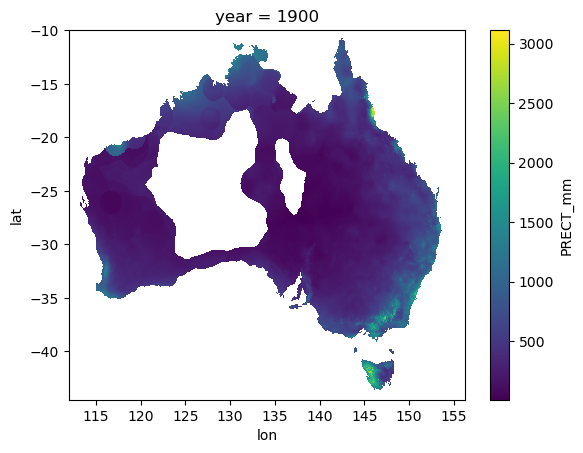

In [114]:
awap.PRECT_mm[0].plot()

In [115]:
awap_rg  = regrid_files(awap)

In [116]:
awap_rg

<xarray.Dataset>
Dimensions:                           (year: 101, lat: 91, lon: 180)
Coordinates:
  * year                              (year) int64 1900 1901 1902 ... 1999 2000
  * lat                               (lat) int64 -90 -88 -86 -84 ... 86 88 90
  * lon                               (lon) int64 0 2 4 6 8 ... 352 354 356 358
Data variables: (12/42)
    pre                               (year, lat, lon) float32 0.0 0.0 ... 0.0
    PRECT_mm                          (year, lat, lon) float32 0.0 0.0 ... 0.0
    drought_years_2s2e                (year, lat, lon) int64 0 0 0 0 ... 0 0 0 0
    drought_years_median              (year, lat, lon) float32 0.0 0.0 ... 0.0
    drought_years_20perc              (year, lat, lon) float32 0.0 0.0 ... 0.0
    drought_years_120pc_2med          (year, lat, lon) int64 0 0 0 0 ... 0 0 0 0
    ...                                ...
    droughts_220pc_1med_intensity     (year, lat, lon) float64 0.0 0.0 ... 0.0
    droughts_2s2e_severity            (year, lat, lon) float64 0.0 0.0 ... 0.0
    droughts_median_severity          (year, lat, lon) float64 0.0 0.0 ... 0.0
    droughts_20perc_severity          (year, lat, lon) float64 0.0 0.0 ... 0.0
    droughts_120pc_2med_severity      (year, lat, lon) float64 0.0 0.0 ... 0.0
    droughts_220pc_1med_severity      (year, lat, lon) float64 0.0 0.0 ... 0.0
Attributes:
    regrid_method:  bilinear

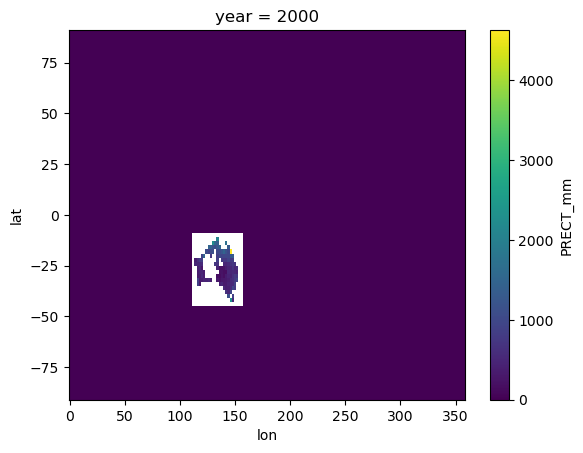

In [117]:
awap_rg.PRECT_mm[-1].plot()

In [118]:
save_netcdf_compression(awap_rg, regridded_hist_output_dir, 'awap_gf_annual_2d.nc')

[########################################] | 100% Completed |  0.1s


# HAVE NOT MODIFIED BELOW HERE

### redo just australia using 850-1850 lm only

In [18]:
# ext = '_pre1850'

# # ff1_precip_lm_annual  = xr.open_dataset('%s/ff%s_precip_lm_annual%s.nc' % (input_dir_lm, '1', ext))
# ff2_precip_lm_annual  = xr.open_dataset('%s/ff%s_precip_lm_annual%s.nc' % (input_dir_lm, '2', ext))
# # ff3_precip_lm_annual  = xr.open_dataset('%s/ff%s_precip_lm_annual%s.nc' % (input_dir_lm, '3', ext))
# # ff4_precip_lm_annual  = xr.open_dataset('%s/ff%s_precip_lm_annual%s.nc' % (input_dir_lm, '4', ext))
# # ff5_precip_lm_annual  = xr.open_dataset('%s/ff%s_precip_lm_annual%s.nc' % (input_dir_lm, '5', ext))
# # ff6_precip_lm_annual  = xr.open_dataset('%s/ff%s_precip_lm_annual%s.nc' % (input_dir_lm, '6', ext))
# # ff7_precip_lm_annual  = xr.open_dataset('%s/ff%s_precip_lm_annual%s.nc' % (input_dir_lm, '7', ext))
# # ff8_precip_lm_annual  = xr.open_dataset('%s/ff%s_precip_lm_annual%s.nc' % (input_dir_lm, '8', ext))
# # ff9_precip_lm_annual  = xr.open_dataset('%s/ff%s_precip_lm_annual%s.nc' % (input_dir_lm, '9', ext))
# # ff10_precip_lm_annual = xr.open_dataset('%s/ff%s_precip_lm_annual%s.nc' % (input_dir_lm, '10', ext))
# # ff11_precip_lm_annual = xr.open_dataset('%s/ff%s_precip_lm_annual%s.nc' % (input_dir_lm, '11', ext))
# # ff12_precip_lm_annual = xr.open_dataset('%s/ff%s_precip_lm_annual%s.nc' % (input_dir_lm, '12', ext))
# # ff13_precip_lm_annual = xr.open_dataset('%s/ff%s_precip_lm_annual%s.nc' % (input_dir_lm, '13', ext))
 
# bcc_precip_lm_annual        = xr.open_dataset('%s/bcc_precip_lm_annual%s.nc' % (input_dir_lm, ext))
# ccsm4_precip_lm_annual      = xr.open_dataset('%s/ccsm4_precip_lm_annual%s.nc' % (input_dir_lm, ext))
# csiro_mk3l_precip_lm_annual = xr.open_dataset('%s/csiro_mk3l_precip_lm_annual%s.nc' % (input_dir_lm, ext))
# fgoals_gl_precip_lm_annual  = xr.open_dataset('%s/fgoals_gl_precip_lm_annual%s.nc' % (input_dir_lm, ext))
# fgoals_s2_precip_lm_annual  = xr.open_dataset('%s/fgoals_s2_precip_lm_annual%s.nc' % (input_dir_lm, ext))
# # giss_21_precip_lm_annual    = xr.open_dataset('%s/giss_21_precip_lm_annual%s.nc' % (input_dir_lm, ext))
# # giss_22_precip_lm_annual    = xr.open_dataset('%s/giss_22_precip_lm_annual%s.nc' % (input_dir_lm, ext))
# # giss_23_precip_lm_annual    = xr.open_dataset('%s/giss_23_precip_lm_annual%s.nc' % (input_dir_lm, ext))
# # giss_24_precip_lm_annual    = xr.open_dataset('%s/giss_24_precip_lm_annual%s.nc' % (input_dir_lm, ext))
# # giss_25_precip_lm_annual    = xr.open_dataset('%s/giss_25_precip_lm_annual%s.nc' % (input_dir_lm, ext))
# # giss_26_precip_lm_annual    = xr.open_dataset('%s/giss_26_precip_lm_annual%s.nc' % (input_dir_lm, ext))
# # giss_27_precip_lm_annual    = xr.open_dataset('%s/giss_27_precip_lm_annual%s.nc' % (input_dir_lm, ext))
# giss_28_precip_lm_annual    = xr.open_dataset('%s/giss_28_precip_lm_annual%s.nc' % (input_dir_lm, ext))
# hadcm3_precip_lm_annual     = xr.open_dataset('%s/hadcm3_precip_lm_annual%s.nc' % (input_dir_lm, ext))
# ipsl_precip_lm_annual       = xr.open_dataset('%s/ipsl_precip_lm_annual%s.nc' % (input_dir_lm, ext))
# miroc_precip_lm_annual      = xr.open_dataset('%s/miroc_precip_lm_annual%s.nc' % (input_dir_lm, ext))
# mpi_precip_lm_annual        = xr.open_dataset('%s/mpi_precip_lm_annual%s.nc' % (input_dir_lm, ext))
# mri_precip_lm_annual        = xr.open_dataset('%s/mri_precip_lm_annual%s.nc' % (input_dir_lm, ext))

# # # ensemble means
# # ff_all_precip_lm_annual = xr.concat([ff1_precip_lm_annual, ff2_precip_lm_annual, 
# #                                      ff3_precip_lm_annual, ff4_precip_lm_annual, 
# #                                      ff5_precip_lm_annual, ff6_precip_lm_annual,
# #                                      ff7_precip_lm_annual, ff8_precip_lm_annual,
# #                                      ff9_precip_lm_annual, ff10_precip_lm_annual, 
# #                                      ff11_precip_lm_annual, ff12_precip_lm_annual, 
# #                                      ff13_precip_lm_annual], dim='en')
# # ff_all_precip_lm_annual_mean = ff_all_precip_lm_annual.mean(dim='en')

# # giss_all_precip_lm_annual = xr.concat([giss_21_precip_lm_annual, giss_22_precip_lm_annual,
# #                                        giss_23_precip_lm_annual, giss_24_precip_lm_annual,
# #                                        giss_25_precip_lm_annual, giss_26_precip_lm_annual,
# #                                        giss_27_precip_lm_annual, giss_28_precip_lm_annual], dim='en')

# # giss_all_precip_lm_annual_mean = giss_all_precip_lm_annual.mean(dim='en')

In [19]:
bcc_precip_lm_annual = bcc_precip_lm_annual.drop(('lat_bnds', 'lon_bnds'))
ccsm4_precip_lm_annual = ccsm4_precip_lm_annual.drop(('lat_bnds', 'lon_bnds'))
csiro_mk3l_precip_lm_annual = csiro_mk3l_precip_lm_annual.drop(('lat_bnds', 'lon_bnds'))
fgoals_gl_precip_lm_annual = fgoals_gl_precip_lm_annual.drop(('lat_bnds', 'lon_bnds'))
fgoals_s2_precip_lm_annual = fgoals_s2_precip_lm_annual.drop(('lat_bnds', 'lon_bnds'))
giss_28_precip_lm_annual = giss_28_precip_lm_annual.drop(('lat_bnds', 'lon_bnds'))
hadcm3_precip_lm_annual = hadcm3_precip_lm_annual.drop(('lat_bnds', 'lon_bnds'))
ipsl_precip_lm_annual = ipsl_precip_lm_annual.drop(('lat_bnds', 'lon_bnds'))
miroc_precip_lm_annual = miroc_precip_lm_annual.drop(('lat_bnds', 'lon_bnds'))
mpi_precip_lm_annual = mpi_precip_lm_annual.drop(('lat_bnds', 'lon_bnds'))
mri_precip_lm_annual = mri_precip_lm_annual.drop(('lat_bnds', 'lon_bnds'))

In [20]:
bcc_precip_lm_annual

<xarray.Dataset>
Dimensions:                           (year: 1151, lat: 64, lon: 128)
Coordinates:
  * lat                               (lat) float64 -87.86 -85.1 ... 85.1 87.86
  * lon                               (lon) float64 0.0 2.812 ... 354.4 357.2
  * year                              (year) int64 850 851 852 ... 1999 2000
Data variables: (12/42)
    pr                                (year, lat, lon) float32 ...
    PRECT_mm                          (year, lat, lon) float64 ...
    drought_years_2s2e                (year, lat, lon) int64 ...
    drought_years_median              (year, lat, lon) float64 ...
    drought_years_20perc              (year, lat, lon) float64 ...
    drought_years_120pc_2med          (year, lat, lon) int64 ...
    ...                                ...
    droughts_220pc_1med_intensity     (year, lat, lon) float64 ...
    droughts_2s2e_severity            (year, lat, lon) float64 ...
    droughts_median_severity          (year, lat, lon) float64 ...
    droughts_20perc_severity          (year, lat, lon) float64 ...
    droughts_120pc_2med_severity      (year, lat, lon) float64 ...
    droughts_220pc_1med_severity      (year, lat, lon) float64 ...

In [21]:
ff2_precip_lm_annual_rg        = regrid_files(ff2_precip_lm_annual)
bcc_precip_lm_annual_rg        = regrid_files(bcc_precip_lm_annual)
ccsm4_precip_lm_annual_rg      = regrid_files(ccsm4_precip_lm_annual)
csiro_mk3l_precip_lm_annual_rg = regrid_files(csiro_mk3l_precip_lm_annual)
fgoals_gl_precip_lm_annual_rg  = regrid_files(fgoals_gl_precip_lm_annual)
fgoals_s2_precip_lm_annual_rg  = regrid_files(fgoals_s2_precip_lm_annual)

In [22]:
ff2_precip_lm_annual_rg.to_netcdf('ff2_precip_lm_annual_rg.nc')
bcc_precip_lm_annual_rg.to_netcdf('bcc_precip_lm_annual_rg.nc')
ccsm4_precip_lm_annual_rg.to_netcdf('ccsm4_precip_lm_annual_rg.nc')
csiro_mk3l_precip_lm_annual_rg.to_netcdf('csiro_mk3l_precip_lm_annual_rg.nc')
fgoals_gl_precip_lm_annual_rg.to_netcdf('fgoals_gl_precip_lm_annual_rg.nc')
fgoals_s2_precip_lm_annual_rg.to_netcdf('fgoals_s2_precip_lm_annual_rg.nc')

In [23]:
giss_28_precip_lm_annual_rg    = regrid_files(giss_28_precip_lm_annual)
hadcm3_precip_lm_annual_rg     = regrid_files(hadcm3_precip_lm_annual)
ipsl_precip_lm_annual_rg       = regrid_files(ipsl_precip_lm_annual)



In [24]:
giss_28_precip_lm_annual_rg.to_netcdf('giss_28_precip_lm_annual_rg.nc')
hadcm3_precip_lm_annual_rg.to_netcdf('hadcm3_precip_lm_annual_rg.nc')
ipsl_precip_lm_annual_rg.to_netcdf('ipsl_precip_lm_annual_rg.nc')

In [25]:
miroc_precip_lm_annual_rg      = regrid_files(miroc_precip_lm_annual)
mpi_precip_lm_annual_rg        = regrid_files(mpi_precip_lm_annual)
mri_precip_lm_annual_rg        = regrid_files(mri_precip_lm_annual)

In [26]:
miroc_precip_lm_annual_rg.to_netcdf('miroc_precip_lm_annual_rg.nc')
mpi_precip_lm_annual_rg.to_netcdf('mpi_precip_lm_annual_rg.nc')
mri_precip_lm_annual_rg.to_netcdf('mri_precip_lm_annual_rg.nc')

open files

In [27]:
giss_28_precip_lm_annual_rg = xr.open_dataset('giss_28_precip_lm_annual_rg.nc')
hadcm3_precip_lm_annual_rg = xr.open_dataset('hadcm3_precip_lm_annual_rg.nc')
ipsl_precip_lm_annual_rg = xr.open_dataset('ipsl_precip_lm_annual_rg.nc')

In [28]:
ff2_precip_lm_annual_rg = xr.open_dataset('ff2_precip_lm_annual_rg.nc')
bcc_precip_lm_annual_rg = xr.open_dataset('bcc_precip_lm_annual_rg.nc')
ccsm4_precip_lm_annual_rg = xr.open_dataset('ccsm4_precip_lm_annual_rg.nc')
csiro_mk3l_precip_lm_annual_rg = xr.open_dataset('csiro_mk3l_precip_lm_annual_rg.nc')
fgoals_gl_precip_lm_annual_rg = xr.open_dataset('fgoals_gl_precip_lm_annual_rg.nc')
fgoals_s2_precip_lm_annual_rg = xr.open_dataset('fgoals_s2_precip_lm_annual_rg.nc')

In [29]:
miroc_precip_lm_annual_rg = xr.open_dataset('miroc_precip_lm_annual_rg.nc')
mpi_precip_lm_annual_rg = xr.open_dataset('mpi_precip_lm_annual_rg.nc')
mri_precip_lm_annual_rg = xr.open_dataset('mri_precip_lm_annual_rg.nc')

In [30]:
bcc_precip_lm_annual_rg        = bcc_precip_lm_annual_rg.drop('pr')
ccsm4_precip_lm_annual_rg      = ccsm4_precip_lm_annual_rg.drop('pr')
csiro_mk3l_precip_lm_annual_rg = csiro_mk3l_precip_lm_annual_rg.drop('pr') 
fgoals_gl_precip_lm_annual_rg  = fgoals_gl_precip_lm_annual_rg.drop('pr')
fgoals_s2_precip_lm_annual_rg  = fgoals_s2_precip_lm_annual_rg.drop('pr')
giss_28_precip_lm_annual_rg    = giss_28_precip_lm_annual_rg.drop('pr')
hadcm3_precip_lm_annual_rg     = hadcm3_precip_lm_annual_rg.drop('pr')
ipsl_precip_lm_annual_rg       = ipsl_precip_lm_annual_rg.drop('pr')
miroc_precip_lm_annual_rg      = miroc_precip_lm_annual_rg.drop('pr')
mpi_precip_lm_annual_rg        = mpi_precip_lm_annual_rg.drop('pr')
mri_precip_lm_annual_rg        = mri_precip_lm_annual_rg.drop('pr')



In [31]:
lm_merged = xr.concat([bcc_precip_lm_annual_rg, ccsm4_precip_lm_annual_rg,  
                       csiro_mk3l_precip_lm_annual_rg, fgoals_gl_precip_lm_annual_rg,  
                       fgoals_s2_precip_lm_annual_rg, giss_28_precip_lm_annual_rg, hadcm3_precip_lm_annual_rg, 
                       ipsl_precip_lm_annual_rg, miroc_precip_lm_annual_rg, 
                       mpi_precip_lm_annual_rg,  mri_precip_lm_annual_rg, 
                       ff2_precip_lm_annual_rg], dim='model')

In [32]:
# lm_merged.to_netcdf('%s/lm_merged_regridded.nc' % input_dir_lm) # 2.5°
lm_merged.to_netcdf('%s/lm_merged_regridded_2deg.nc' % input_dir_lm) # 2°


/var/folders/fm/9nwmq_gd47172_f70p3gk8nr0000gr/T/ipykernel_64991/1253758144.py:2: SerializationWarning: saving variable drought_years_2s2e with floating point data as an integer dtype without any _FillValue to use for NaNs
  lm_merged.to_netcdf('%s/lm_merged_regridded_2deg.nc' % input_dir_lm) # 2°
/var/folders/fm/9nwmq_gd47172_f70p3gk8nr0000gr/T/ipykernel_64991/1253758144.py:2: SerializationWarning: saving variable drought_years_120pc_2med with floating point data as an integer dtype without any _FillValue to use for NaNs
  lm_merged.to_netcdf('%s/lm_merged_regridded_2deg.nc' % input_dir_lm) # 2°
/var/folders/fm/9nwmq_gd47172_f70p3gk8nr0000gr/T/ipykernel_64991/1253758144.py:2: SerializationWarning: saving variable drought_years_220pc_1med with floating point data as an integer dtype without any _FillValue to use for NaNs
  lm_merged.to_netcdf('%s/lm_merged_regridded_2deg.nc' % input_dir_lm) # 2°


In [33]:
lm_merged_aus = get_aus(lm_merged)

In [34]:
# lm_merged_aus.to_netcdf('%s/lm_merged_regridded_aus.nc' % input_dir_lm) # 2.5°
lm_merged_aus.to_netcdf('%s/lm_merged_regridded_aus_2deg.nc' % input_dir_lm) # 2°



# control

In [6]:
cntl_dir = '%s/control_v2/' % input_dir

In [8]:
cntl_dir = '%s/control_v2/' % input_dir

cesmlme_cntl = xr.open_dataset('%s/cesmlme_precip_cntl_annual.nc' % cntl_dir)
bcc_cntl     = xr.open_dataset('%s/bcc_precip_cntl_annual.nc' % cntl_dir)
ccsm4_cntl   = xr.open_dataset('%s/ccsm4_precip_cntl_annual.nc' % cntl_dir)
csiro_mk3l_cntl = xr.open_dataset('%s/csiro_mk3l_precip_cntl_annual.nc' % cntl_dir)
# fgoals_gl_cntl = xr.open_dataset('%s/fgoals_gl/fgoals_gl_precip_annual*.nc' % boots_dir, concat_dim='n', combine='nested')
fgoals_s2_cntl = xr.open_dataset('%s/fgoals_s2_precip_cntl_annual.nc' % cntl_dir)
giss_21_cntl = xr.open_dataset('%s/giss_2_precip_cntl_annual.nc' % cntl_dir)
hadmc3_cntl = xr.open_dataset('%s/hadcm3_precip_cntl_annual.nc' % cntl_dir)
ipsl_cntl = xr.open_dataset('%s/ipsl_precip_cntl_annual.nc' % cntl_dir)
miroc_cntl = xr.open_dataset('%s/miroc_precip_cntl_annual.nc' % cntl_dir)
mpi_cntl = xr.open_dataset('%s/mpi_precip_cntl_annual.nc' % cntl_dir)
mri_cntl = xr.open_dataset('%s/mri_precip_cntl_annual.nc' % cntl_dir)



In [9]:
bcc_cntl = bcc_cntl.drop(('lat_bnds', 'lon_bnds'))
ccsm4_cntl = ccsm4_cntl.drop(('lat_bnds', 'lon_bnds'))
csiro_mk3l_cntl = csiro_mk3l_cntl.drop(('lat_bnds', 'lon_bnds'))
fgoals_s2_cntl = fgoals_s2_cntl.drop(('lat_bnds', 'lon_bnds'))
giss_21_cntl = giss_21_cntl.drop(('lat_bnds', 'lon_bnds'))
hadmc3_cntl = hadmc3_cntl.drop(('lat_bnds', 'lon_bnds'))
ipsl_cntl = ipsl_cntl.drop(('lat_bnds', 'lon_bnds'))
miroc_cntl = miroc_cntl.drop(('lat_bnds', 'lon_bnds'))
mpi_cntl = mpi_cntl.drop(('lat_bnds', 'lon_bnds', 'time_bnds'))
mri_cntl = mri_cntl.drop(('lat_bnds', 'lon_bnds'))

## regrid

In [10]:
cesmlme_cntl_rg = regrid_files(cesmlme_cntl)
bcc_cntl_rg     = regrid_files(bcc_cntl)
ccsm4_cntl_rg   = regrid_files(ccsm4_cntl)
csiro_mk3l_cntl_rg = regrid_files(csiro_mk3l_cntl)
fgoals_s2_cntl_rg = regrid_files(fgoals_s2_cntl)
giss_21_cntl_rg = regrid_files(giss_21_cntl)
hadmc3_cntl_rg = regrid_files(hadmc3_cntl)
ipsl_cntl_rg = regrid_files(ipsl_cntl)
miroc_cntl_rg = regrid_files(miroc_cntl)
mpi_cntl_rg = regrid_files(mpi_cntl)
mri_cntl_rg = regrid_files(mri_cntl)

Create weight file: bilinear_96x144_91x180.nc
Remove file bilinear_96x144_91x180.nc
using dimensions ('lat', 'lon') from data variable PRECT as the horizontal dimensions for this dataset.


/Users/nickywright/miniconda3/lib/python3.7/site-packages/xesmf/frontend.py:486: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  keep_attrs=keep_attrs


Create weight file: bilinear_64x128_91x180.nc
Remove file bilinear_64x128_91x180.nc
using dimensions ('lat', 'lon') from data variable pr as the horizontal dimensions for this dataset.


/Users/nickywright/miniconda3/lib/python3.7/site-packages/xesmf/frontend.py:486: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  keep_attrs=keep_attrs


Create weight file: bilinear_192x288_91x180.nc
Remove file bilinear_192x288_91x180.nc
using dimensions ('lat', 'lon') from data variable pr as the horizontal dimensions for this dataset.


/Users/nickywright/miniconda3/lib/python3.7/site-packages/xesmf/frontend.py:486: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  keep_attrs=keep_attrs


Create weight file: bilinear_56x64_91x180.nc
Remove file bilinear_56x64_91x180.nc
using dimensions ('lat', 'lon') from data variable pr as the horizontal dimensions for this dataset.


/Users/nickywright/miniconda3/lib/python3.7/site-packages/xesmf/frontend.py:486: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  keep_attrs=keep_attrs


Create weight file: bilinear_108x128_91x180.nc
Remove file bilinear_108x128_91x180.nc
using dimensions ('lat', 'lon') from data variable pr as the horizontal dimensions for this dataset.


/Users/nickywright/miniconda3/lib/python3.7/site-packages/xesmf/frontend.py:486: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  keep_attrs=keep_attrs


Create weight file: bilinear_90x144_91x180.nc
Remove file bilinear_90x144_91x180.nc
using dimensions ('lat', 'lon') from data variable pr as the horizontal dimensions for this dataset.


/Users/nickywright/miniconda3/lib/python3.7/site-packages/xesmf/frontend.py:486: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  keep_attrs=keep_attrs


Create weight file: bilinear_73x96_91x180.nc
Remove file bilinear_73x96_91x180.nc
using dimensions ('lat', 'lon') from data variable pr as the horizontal dimensions for this dataset.


/Users/nickywright/miniconda3/lib/python3.7/site-packages/xesmf/frontend.py:486: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  keep_attrs=keep_attrs


Create weight file: bilinear_96x96_91x180.nc
Remove file bilinear_96x96_91x180.nc
using dimensions ('lat', 'lon') from data variable pr as the horizontal dimensions for this dataset.


/Users/nickywright/miniconda3/lib/python3.7/site-packages/xesmf/frontend.py:486: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  keep_attrs=keep_attrs


Create weight file: bilinear_64x128_91x180.nc
Remove file bilinear_64x128_91x180.nc
using dimensions ('lat', 'lon') from data variable pr as the horizontal dimensions for this dataset.


/Users/nickywright/miniconda3/lib/python3.7/site-packages/xesmf/frontend.py:486: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  keep_attrs=keep_attrs


Create weight file: bilinear_96x192_91x180.nc
Remove file bilinear_96x192_91x180.nc
using dimensions ('lat', 'lon') from data variable pr as the horizontal dimensions for this dataset.


/Users/nickywright/miniconda3/lib/python3.7/site-packages/xesmf/frontend.py:486: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  keep_attrs=keep_attrs


Create weight file: bilinear_160x320_91x180.nc
Remove file bilinear_160x320_91x180.nc
using dimensions ('lat', 'lon') from data variable pr as the horizontal dimensions for this dataset.


/Users/nickywright/miniconda3/lib/python3.7/site-packages/xesmf/frontend.py:486: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  keep_attrs=keep_attrs


In [11]:
cesmlme_cntl_rg.to_netcdf('cesmlme_cntl_rg.nc')
bcc_cntl_rg.to_netcdf('bcc_cntl_rg.nc')
ccsm4_cntl_rg.to_netcdf('ccsm4_cntl_rg.nc')
csiro_mk3l_cntl_rg.to_netcdf('csiro_mk3l_cntl_rg.nc')
fgoals_s2_cntl_rg.to_netcdf('fgoals_s2_cntl_rg.nc')
giss_21_cntl_rg.to_netcdf('giss_21_cntl_rg.nc')
hadmc3_cntl_rg.to_netcdf('hadmc3_cntl_rg.nc')
ipsl_cntl_rg.to_netcdf('ipsl_cntl_rg.nc')
miroc_cntl_rg.to_netcdf('miroc_cntl_rg.nc')
mpi_cntl_rg.to_netcdf('mpi_cntl_rg.nc')
mri_cntl_rg.to_netcdf('mri_cntl_rg.nc')

In [7]:
cesmlme_cntl_rg = xr.open_dataset('cesmlme_cntl_rg.nc')
bcc_cntl_rg = xr.open_dataset('bcc_cntl_rg.nc')
ccsm4_cntl_rg = xr.open_dataset('ccsm4_cntl_rg.nc')
csiro_mk3l_cntl_rg = xr.open_dataset('csiro_mk3l_cntl_rg.nc')
fgoals_s2_cntl_rg  = xr.open_dataset('fgoals_s2_cntl_rg.nc')
giss_21_cntl_rg      = xr.open_dataset('giss_21_cntl_rg.nc')
hadmc3_cntl_rg      = xr.open_dataset('hadmc3_cntl_rg.nc')
ipsl_cntl_rg     = xr.open_dataset('ipsl_cntl_rg.nc')
miroc_cntl_rg    = xr.open_dataset('miroc_cntl_rg.nc')
mpi_cntl_rg      = xr.open_dataset('mpi_cntl_rg.nc')
mri_cntl_rg      = xr.open_dataset('mri_cntl_rg.nc')

In [8]:
bcc_cntl_rg = bcc_cntl_rg.drop('pr')
ccsm4_cntl_rg = ccsm4_cntl_rg.drop('pr')
csiro_mk3l_cntl_rg = csiro_mk3l_cntl_rg.drop('pr')
fgoals_s2_cntl_rg =  fgoals_s2_cntl_rg.drop('pr')
giss_21_cntl_rg   =  giss_21_cntl_rg.drop('pr')
hadmc3_cntl_rg     = hadmc3_cntl_rg.drop('pr')
ipsl_cntl_rg     =ipsl_cntl_rg.drop('pr')
miroc_cntl_rg    =miroc_cntl_rg.drop('pr')
mpi_cntl_rg      =mpi_cntl_rg.drop('pr')
mri_cntl_rg      = mri_cntl_rg.drop('pr')

In [9]:
cntl_merged = xr.concat([bcc_cntl_rg, ccsm4_cntl_rg,  
                       csiro_mk3l_cntl_rg, fgoals_s2_cntl_rg,  
                       giss_21_cntl_rg, hadmc3_cntl_rg], dim='model') 

/Users/nickywright/miniconda3/lib/python3.7/site-packages/xarray/core/alignment.py:307: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  index = joiner(matching_indexes)


KeyboardInterrupt: 

In [10]:
cntl_merged.to_netcdf('%s/cntl_merged_p1.nc' % cntl_dir)

In [10]:
cntl_merged_p2 = xr.concat([ipsl_cntl_rg, miroc_cntl_rg, mpi_cntl_rg,  mri_cntl_rg, 
                       cesmlme_cntl_rg], dim='model')

In [11]:
cntl_merged_p2.to_netcdf('%s/cntl_merged_p2.nc' % cntl_dir)

In [12]:
cntl_merged = xr.open_dataset('%s/cntl_merged_p1.nc' % cntl_dir)

In [ ]:
cntl_merged_p2 = xr.open_dataset('%s/cntl_merged_p2.nc' % cntl_dir)

In [13]:
cntl_merged_p1_aus = get_aus(cntl_merged)
cntl_merged_p2_aus = get_aus(cntl_merged_p2)

In [ ]:
# cntl_merged = xr.concat([bcc_cntl_rg, ccsm4_cntl_rg,  
#                        csiro_mk3l_cntl_rg, fgoals_s2_cntl_rg,  
#                        giss_21_cntl_rg, hadmc3_cntl_rg, 
#                        ipsl_cntl_rg, miroc_cntl_rg, 
#                        mpi_cntl_rg,  mri_cntl_rg, 
#                        cesmlme_cntl_rg], dim='model')

/Users/nickywright/miniconda3/lib/python3.7/site-packages/xarray/core/alignment.py:307: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  index = joiner(matching_indexes)


In [14]:
cntl_merged_aus_comb = xr.concat([cntl_merged_p1_aus, cntl_merged_p2_aus], dim='model')

/Users/nickywright/miniconda3/lib/python3.7/site-packages/xarray/core/alignment.py:307: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  index = joiner(matching_indexes)


In [15]:
cntl_merged_aus_comb.to_netcdf('%s/cntl_merged_regridded_aus_2deg.nc' % cntl_dir) # 2°



In [ ]:
# cntl_merged_aus = get_aus(cntl_merged)

In [ ]:
cntl_merged.to_netcdf('%s/cntl_merged_regridded_2deg.nc' % cntl_dir) # 2°
cntl_merged_aus.to_netcdf('%s/cntl_merged_regridded_aus_2deg.nc' % cntl_dir) # 2°


